In [46]:
from pfp_stat import *

import numpy as np
import pandas as pd 

import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib

import datetime as dat

from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF
import fpdf

from pfp_products import *

import os.path
from scipy.optimize import minimize

In [57]:
def show_me(points_in_year, stat_depth, BAs):
    cors = calc_correlations(BAs, points_in_year, stat_depth)

    for row in range(cors.shape[1]):
        plt.plot(cors[:,row], color = (0.5+0.5*row/cors.shape[1],0.1,0.1), label = str(stat_depth[row]) + ' years history')

    plt.title('"' + BAs[0] + '"' + ' and ' + '"' + BAs[1] + '" correlation')
    #plt.xticks(range(cors.shape[0]), points_in_year) 
    plt.xlabel('точек в году')
    plt.legend()
    plt.axvline(x = 2)
    plt.show()
    
    return

In [58]:
points_in_year = [3, 6, 12, 24, 36, 48, 60, 125, 260]
stat_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[3, 6, 12, 24, 36, 48, 60, 125, 260]


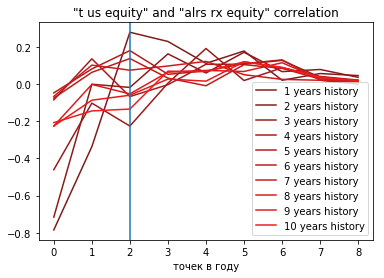

In [59]:
show_me(points_in_year, stat_depth, ['t us equity', 'alrs rx equity'])

[3, 6, 12, 24, 36, 48, 60, 125, 260]


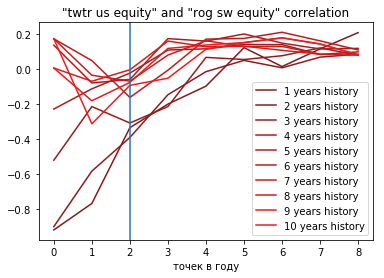

In [60]:
show_me(points_in_year, stat_depth, ['twtr us equity', 'rog sw equity'])

[3, 6, 12, 24, 36, 48, 60, 125, 260]


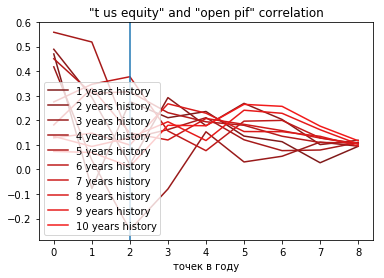

In [61]:
show_me(points_in_year, stat_depth, ['t us equity', 'open pif'])